In [51]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


In [52]:
import warnings
warnings.simplefilter('ignore')

In [53]:
df = pd.read_csv("data.csv")
df = df.drop(['Unnamed: 32', 'id'], axis=1)

#encoding the the target feature
df['diagnosis']= df['diagnosis'].replace('M', 1)
df['diagnosis']= df['diagnosis'].replace('B', 0)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


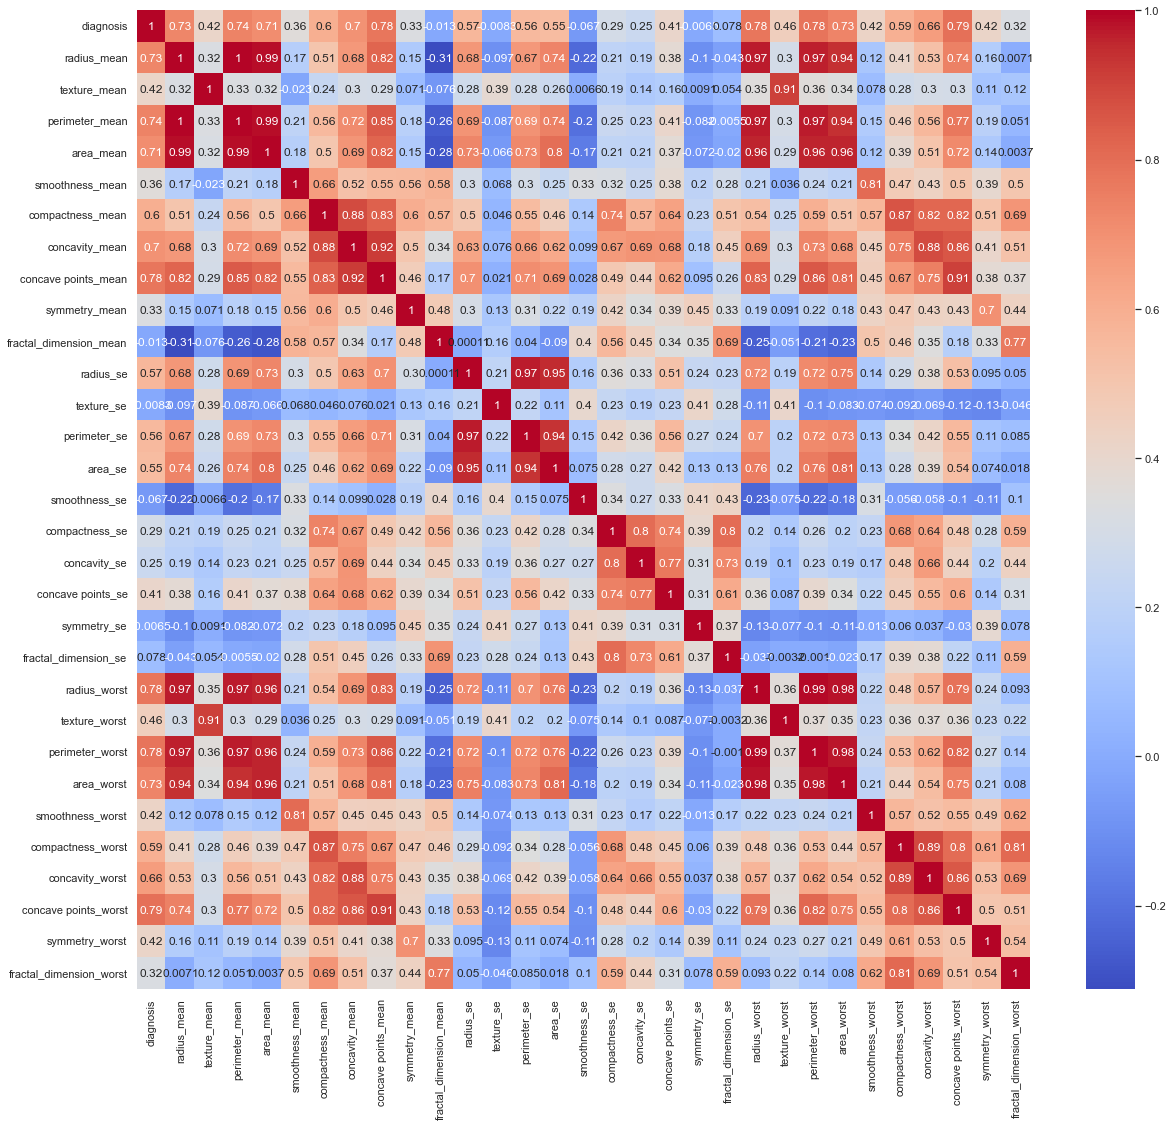

In [54]:
corr = df.corr()
plt.figure(figsize=(20,18))
sns.heatmap(corr, cmap='coolwarm', annot = True)
plt.show()


In [55]:
acc=df[df.columns[:]].corr()['diagnosis']
print('All features  with thier correlations is: \n',acc)

All features  with thier correlations is: 
 diagnosis                  1.000000
radius_mean                0.730029
texture_mean               0.415185
perimeter_mean             0.742636
area_mean                  0.708984
smoothness_mean            0.358560
compactness_mean           0.596534
concavity_mean             0.696360
concave points_mean        0.776614
symmetry_mean              0.330499
fractal_dimension_mean    -0.012838
radius_se                  0.567134
texture_se                -0.008303
perimeter_se               0.556141
area_se                    0.548236
smoothness_se             -0.067016
compactness_se             0.292999
concavity_se               0.253730
concave points_se          0.408042
symmetry_se               -0.006522
fractal_dimension_se       0.077972
radius_worst               0.776454
texture_worst              0.456903
perimeter_worst            0.782914
area_worst                 0.733825
smoothness_worst           0.421465
compactness_worst   

In [56]:
#finding out the positively corelated feature
cc=corr[abs(corr['diagnosis']) > 0.5].index
print('- Number of most correlated features = ', len(cc))
print('--------------------------------------------------')
print('- Most correlated features is: \n ',cc)

- Number of most correlated features =  16
--------------------------------------------------
- Most correlated features is: 
  Index(['diagnosis', 'radius_mean', 'perimeter_mean', 'area_mean',
       'compactness_mean', 'concavity_mean', 'concave points_mean',
       'radius_se', 'perimeter_se', 'area_se', 'radius_worst',
       'perimeter_worst', 'area_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst'],
      dtype='object')


In [57]:
#finding out the negatively corelated feature
cc2=corr[abs(corr['diagnosis']) <= 0.5].index
print('- Number of Least correlated features = ', len(cc2))
print('--------------------------------------------------')
print('- Least correlated features is: \n ',cc2)

- Number of Least correlated features =  15
--------------------------------------------------
- Least correlated features is: 
  Index(['texture_mean', 'smoothness_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'texture_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'texture_worst', 'smoothness_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [58]:
df_cor = df.drop(["radius_mean", "perimeter_mean", "area_mean", "radius_worst", "perimeter_worst"], axis=1)
df_cor.head()


,diagnosis,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,symmetry_se,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,10.38,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,...,0.03003,0.006193,17.33,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,17.77,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,...,0.01389,0.003532,23.41,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,21.25,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,...,0.02250,0.004571,25.53,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,20.38,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,...,0.05963,0.009208,26.50,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,14.34,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,...,0.01756,0.005115,16.67,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [59]:
df_20 = df[[   'diagnosis', 'perimeter_worst', 'concave points_worst','texture_mean', 
            'smoothness_mean', 'symmetry_mean', 'texture_worst', 'smoothness_worst',
            'radius_mean', 'area_mean',
            'compactness_mean', 'concavity_mean', 'concave points_mean',
            'area_worst', 'compactness_worst',
            'concavity_worst', 'area_se','fractal_dimension_se',
            'symmetry_worst', 'fractal_dimension_worst'
         ]].copy()
df_20.head()

,diagnosis,perimeter_worst,concave points_worst,texture_mean,smoothness_mean,symmetry_mean,texture_worst,smoothness_worst,radius_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,area_worst,compactness_worst,concavity_worst,area_se,fractal_dimension_se,symmetry_worst,fractal_dimension_worst
0,1,184.60,0.2654,10.38,0.11840,0.2419,17.33,0.1622,17.99,1001.0,0.27760,0.3001,0.14710,2019.0,0.6656,0.7119,153.40,0.006193,0.4601,0.11890
1,1,158.80,0.1860,17.77,0.08474,0.1812,23.41,0.1238,20.57,1326.0,0.07864,0.0869,0.07017,1956.0,0.1866,0.2416,74.08,0.003532,0.2750,0.08902
2,1,152.50,0.2430,21.25,0.10960,0.2069,25.53,0.1444,19.69,1203.0,0.15990,0.1974,0.12790,1709.0,0.4245,0.4504,94.03,0.004571,0.3613,0.08758
3,1,98.87,0.2575,20.38,0.14250,0.2597,26.50,0.2098,11.42,386.1,0.28390,0.2414,0.10520,567.7,0.8663,0.6869,27.23,0.009208,0.6638,0.17300
4,1,152.20,0.1625,14.34,0.10030,0.1809,16.67,0.1374,20.29,1297.0,0.13280,0.1980,0.10430,1575.0,0.2050,0.4000,94.44,0.005115,0.2364,0.07678


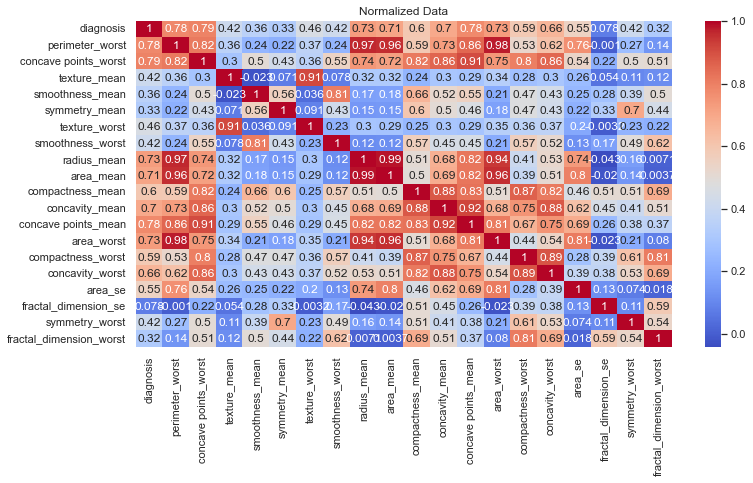

In [60]:
#plotting the corellation matrix
corr = df_20.corr()
plt.figure(figsize=(12,6))
sns.heatmap(corr, cmap='coolwarm', annot = True)
plt.title("Normalized Data")
plt.show()

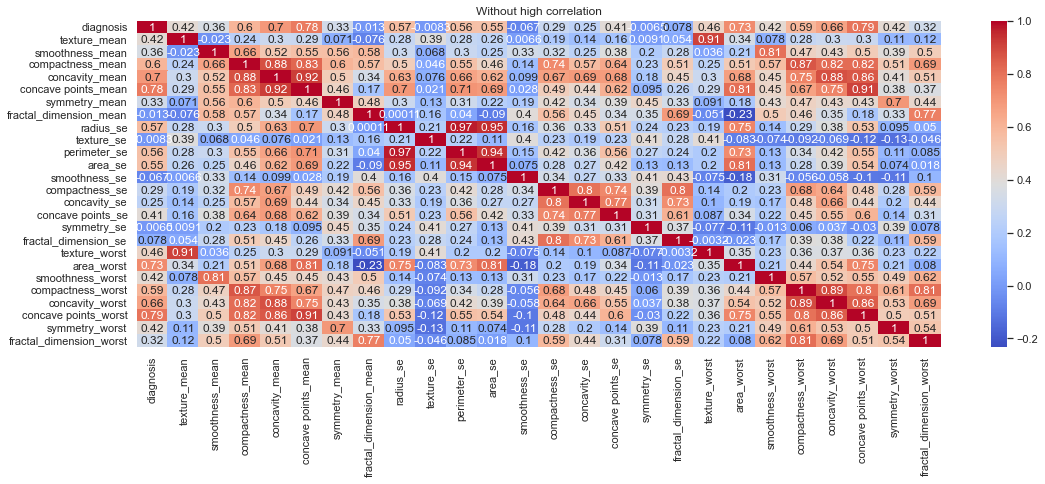

In [61]:
#plotting the corellation matrix
corr = df_cor.corr()
plt.figure(figsize=(18,6))
sns.heatmap(corr, cmap='coolwarm', annot = True)
plt.title("Without high correlation")
plt.show()

In [62]:
x = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']

sc = StandardScaler()
x_std = sc.fit_transform(x)
# X_test = sc.transform(X_test)


#splitting the dataframe and keeping 80% of the data for training and rest 20% for testing
X_train, X_test, y_train, y_test = train_test_split(x_std, y, test_size=0.2, random_state=42, stratify = y)
# print(len(y_train))



#dividing the dataframe into training and target features
x_20 = df_20.drop(['diagnosis'], axis=1)
y_20 = df_20['diagnosis']
sc = StandardScaler()
x_std_20 = sc.fit_transform(x_20)
# X_test20 = sc.transform(X_test20)
#splitting the dataframe and keeping 80% of the data for training and rest 20% for testing
X_train20, X_test20, y_train20, y_test20 = train_test_split(x_std_20, y_20, test_size=0.2, random_state=42, stratify = y_20)
# print(len(y_train))





x_cor = df_cor.drop(['diagnosis'], axis=1)
y_cor = df_cor['diagnosis']

sc = StandardScaler()
x_std_cor = sc.fit_transform(x_cor)
# X_test_cor = sc.transform(X_test_cor)
#splitting the dataframe and keeping 80% of the data for training and rest 20% for testing
X_train_cor, X_test_cor, y_train_cor, y_test_cor = train_test_split(x_cor, y_cor, test_size=0.2, random_state=42, stratify = y)
# print(len(y_train))



In [125]:
def find_scores(X_train, y_train):
    classifiers = []
    scores = []

    # Percepltron learning algorithm
    perceptron_classifier = Perceptron()
    perceptron_score = round(np.mean(cross_val_score(perceptron_classifier, X_train, y=y_train, scoring='f1_micro', cv=10))*100,2)
    scores.append(perceptron_score)
    classifiers.append(perceptron_classifier)

    # logistic regression
    log_reg_classifier = LogisticRegression()
    log_reg_score = round(np.mean(cross_val_score(log_reg_classifier, X_train, y=y_train, scoring='f1_micro', cv=10))*100,2)
    scores.append(log_reg_score)
    classifiers.append(log_reg_classifier)

    # SVM linear model
    svm_lin_classifier = SVC(kernel = 'linear', random_state = 0)
    svm_lin_score = round(np.mean(cross_val_score(svm_lin_classifier, X_train, y=y_train, scoring='f1_micro', cv=10))*100,2)
    scores.append(svm_lin_score)
    classifiers.append(svm_lin_classifier)

    # RBF svm model
    rbf_svm_classifier = SVC(kernel = 'rbf', random_state = 0)
    rbf_svm_score = round(np.mean(cross_val_score(rbf_svm_classifier, X_train, y=y_train, scoring='f1_micro', cv=10))*100,2)
    scores.append(rbf_svm_score)
    classifiers.append(rbf_svm_classifier)

    # Decision tree classifier
    dt_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    dt_score = round(np.mean(cross_val_score(dt_classifier, X_train, y=y_train, scoring='f1_micro', cv=10))*100,2)
    scores.append(dt_score)
    classifiers.append(dt_classifier)

    # Random Forest
    forest = RandomForestClassifier(criterion = 'entropy', random_state = 0)
    forest_score = round(np.mean(cross_val_score(forest, X_train, y=y_train, scoring='f1_micro', cv=10))*100,2)
    scores.append(forest_score)
    classifiers.append(forest)


    # NN
    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=((X_train.shape[1]),)))
    model.add(Dropout(0.4))
    model.add(keras.layers.BatchNormalization())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.2))
    model.add(keras.layers.BatchNormalization())
    model.add(Dense(128, activation='relu'))
    # model.add(Dropout(0.4))
    model.add(keras.layers.BatchNormalization())
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy']) # ['binary_accuracy']
    history = model.fit(X_train, y_train, epochs=16, batch_size=32, verbose=1, validation_split=0.1)
    scores.append(round(history.history['val_accuracy'][-1]*100,2))
    # score_20 = model_cor.evaluate(X_test20, y_test20, batch_size=16) # 16 - 0.974286, 32 - 0.968571
    return scores, classifiers



scores, clfs = find_scores(X_train, y_train)
scores_20, clfs_20 = find_scores(X_train20, y_train20)
scores_cor, clfs_cor = find_scores(X_train_cor, y_train_cor)

Epoch 1/16
13/13 [==============================] - 1s 14ms/step - loss: 0.2815 - accuracy: 0.8655 - val_loss: 0.3382 - val_accuracy: 0.9565
Epoch 2/16
13/13 [==============================] - 0s 4ms/step - loss: 0.1062 - accuracy: 0.9633 - val_loss: 0.2408 - val_accuracy: 0.9783
Epoch 3/16
13/13 [==============================] - 0s 4ms/step - loss: 0.0895 - accuracy: 0.9633 - val_loss: 0.1796 - val_accuracy: 0.9783
Epoch 4/16
13/13 [==============================] - 0s 4ms/step - loss: 0.0706 - accuracy: 0.9780 - val_loss: 0.1539 - val_accuracy: 1.0000
Epoch 5/16
13/13 [==============================] - 0s 4ms/step - loss: 0.0713 - accuracy: 0.9780 - val_loss: 0.1149 - val_accuracy: 1.0000
Epoch 6/16
13/13 [==============================] - 0s 5ms/step - loss: 0.0549 - accuracy: 0.9829 - val_loss: 0.0959 - val_accuracy: 0.9783
Epoch 7/16
13/13 [==============================] - 0s 4ms/step - loss: 0.0500 - accuracy: 0.9804 - val_loss: 0.0917 - val_accuracy: 0.9783
Epoch 8/16
13/13 [=

In [126]:
print(scores)
print(scores_20)
print(scores_cor)


[96.92, 97.37, 96.47, 97.14, 93.59, 96.25, 100.0]
[95.59, 97.14, 96.7, 96.91, 92.72, 96.03, 95.65]
[62.24, 95.81, 96.46, 91.85, 93.83, 96.02, 91.3]


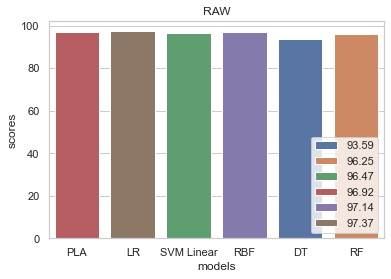

In [65]:
models = ["PLA", "LR", "SVM Linear", "RBF", "DT", "RF"]
sns.set_theme(style="whitegrid")
df = pd.DataFrame({'models': models, 'scores': scores})
ax = sns.barplot(x="models", y="scores", data=df,hue="scores", dodge=False).set_title("RAW")
plt.legend(loc="lower right")


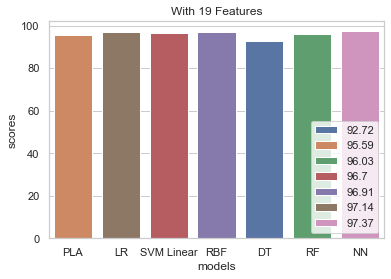

In [80]:
sns.set_theme(style="whitegrid")
df = pd.DataFrame({'models': models, 'scores': scores_20})
ax = sns.barplot(x="models", y="scores", data=df,hue="scores", dodge=False).set_title("With 19 Features")
plt.legend(loc="lower right")

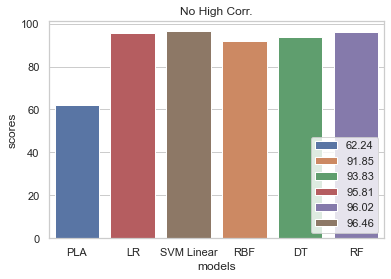

In [67]:
sns.set_theme(style="whitegrid")
df = pd.DataFrame({'models': models, 'scores': scores_cor})
ax = sns.barplot(x="models", y="scores", data=df,hue="scores", dodge=False).set_title("No High Corr.")
plt.legend(loc="lower right")

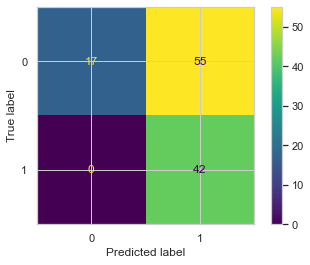

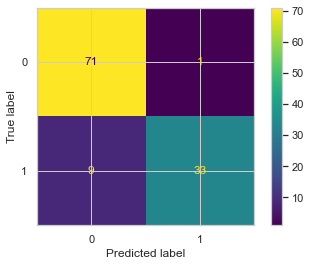

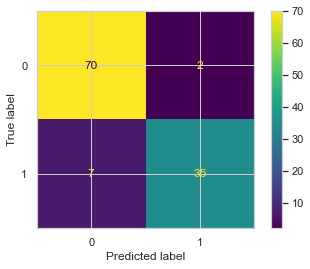

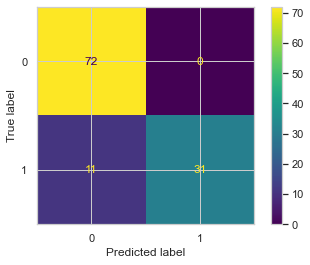

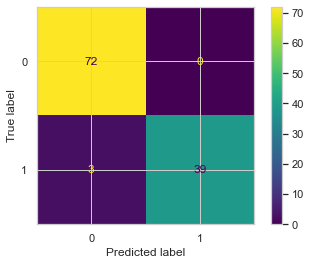

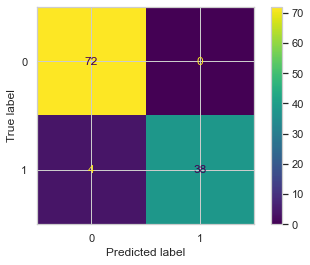

In [68]:
def display_cm(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    cm_display = ConfusionMatrixDisplay(cm).plot()
    return cm_display

for i in range(len(clfs_cor)):
    clfs_cor[i].fit(X_train_cor, y_train_cor)
    clfs_cor[i].score(x_cor, y_cor)
    y_pred = clfs_cor[i].predict(X_test_cor)
    cm = display_cm(y_test_cor, y_pred)


    # clfs_cor[i].fit(X_train_cor, y_train_cor)
    # clfs_cor[i].score(x, y)
    # y_pred = clfs_cor[i].predict(X_test_cor)
    # cm = display_cm(y_test_cor, y_pred)

In [19]:

from keras.layers import Dense
from keras.layers import Dropout
from keras.models import Sequential
import keras
import keras.utils
from keras import utils as np_utils

In [168]:
#Define your architecture.
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(19,)))
# model.add(keras.layers.BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.2))
model.add(keras.layers.BatchNormalization())
model.add(Dense(128, activation='relu'))
# model.add(keras.layers.BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(64, activation='relu'))
# model.add(keras.layers.BatchNormalization())
model.add(Dropout(0.2))


model.add(Dense(32, activation='relu'))
model.add(keras.layers.BatchNormalization())

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy']) # ['binary_accuracy']

history = model.fit(X_train20, y_train20, epochs=16, batch_size=32, verbose=1, validation_split=0.1)
score = model.evaluate(X_test20, y_test20, batch_size=16) # 16 - 0.974286, 32 - 0.968571
print("score = ", score)

Epoch 1/16
13/13 [==============================] - 1s 14ms/step - loss: 0.4354 - accuracy: 0.7873 - val_loss: 0.5695 - val_accuracy: 0.9130
Epoch 2/16
13/13 [==============================] - 0s 5ms/step - loss: 0.2268 - accuracy: 0.9291 - val_loss: 0.4620 - val_accuracy: 0.9565
Epoch 3/16
13/13 [==============================] - 0s 4ms/step - loss: 0.1291 - accuracy: 0.9756 - val_loss: 0.3941 - val_accuracy: 0.9565
Epoch 4/16
13/13 [==============================] - 0s 5ms/step - loss: 0.1121 - accuracy: 0.9682 - val_loss: 0.3676 - val_accuracy: 0.9348
Epoch 5/16
13/13 [==============================] - 0s 5ms/step - loss: 0.0916 - accuracy: 0.9756 - val_loss: 0.3327 - val_accuracy: 0.9348
Epoch 6/16
13/13 [==============================] - 0s 5ms/step - loss: 0.0865 - accuracy: 0.9756 - val_loss: 0.2953 - val_accuracy: 0.9348
Epoch 7/16
13/13 [==============================] - 0s 5ms/step - loss: 0.0774 - accuracy: 0.9780 - val_loss: 0.2897 - val_accuracy: 0.9348
Epoch 8/16
13/13 [=

In [128]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy']) # ['binary_accuracy']
X_train.shape

(455, 30)

In [129]:
history = model.fit(X_train, y_train, epochs=8, batch_size=32, verbose=1, validation_split=0.1)


Epoch 1/8
13/13 [==============================] - 0s 10ms/step - loss: 0.5284 - accuracy: 0.7531 - val_loss: 0.2724 - val_accuracy: 0.9565
Epoch 2/8
13/13 [==============================] - 0s 3ms/step - loss: 0.2464 - accuracy: 0.9315 - val_loss: 0.1558 - val_accuracy: 0.9565
Epoch 3/8
13/13 [==============================] - 0s 3ms/step - loss: 0.1582 - accuracy: 0.9487 - val_loss: 0.1183 - val_accuracy: 0.9565
Epoch 4/8
13/13 [==============================] - 0s 3ms/step - loss: 0.1129 - accuracy: 0.9707 - val_loss: 0.1061 - val_accuracy: 0.9565
Epoch 5/8
13/13 [==============================] - 0s 3ms/step - loss: 0.1058 - accuracy: 0.9707 - val_loss: 0.0986 - val_accuracy: 0.9565
Epoch 6/8
13/13 [==============================] - 0s 3ms/step - loss: 0.0855 - accuracy: 0.9804 - val_loss: 0.0985 - val_accuracy: 0.9565
Epoch 7/8
13/13 [==============================] - 0s 3ms/step - loss: 0.0786 - accuracy: 0.9780 - val_loss: 0.0930 - val_accuracy: 0.9565
Epoch 8/8
13/13 [=========

In [130]:
score = model.evaluate(X_test, y_test, batch_size=16) # 16 - 0.974286, 32 - 0.968571
print("score = ", score)
scores.append(round(score[1]*100,2))

8/8 [==============================] - 0s 714us/step - loss: 0.0647 - accuracy: 0.9825
score =  [0.06469106674194336, 0.9824561476707458]


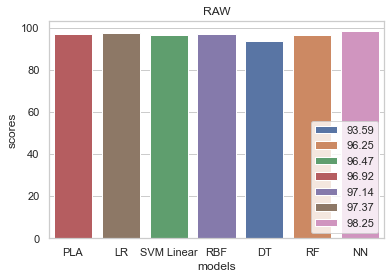

In [34]:
models = ["PLA", "LR", "SVM Linear", "RBF", "DT", "RF", "NN"]
sns.set_theme(style="whitegrid")
df = pd.DataFrame({'models': models, 'scores': scores})
ax = sns.barplot(x="models", y="scores", data=df,hue="scores", dodge=False).set_title("RAW")
plt.legend(loc="lower right")

In [82]:
model_cor = Sequential()
model_cor.add(Dense(128, activation='relu', input_shape=(19,)))
model_cor.add(Dropout(0.2))
model_cor.add(Dense(64, activation='relu'))
model_cor.add(Dropout(0.4))
model_cor.add(Dense(1, activation='sigmoid'))

model_cor.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy']) # ['binary_accuracy']
history = model_cor.fit(X_train20, y_train20, epochs=8, batch_size=32, verbose=1, validation_split=0.1)

score_20 = model_cor.evaluate(X_test20, y_test20, batch_size=16) # 16 - 0.974286, 32 - 0.968571
print("score = ", score_20)
# scores_20.append(round(score_20[1]*100,2))
history.history
# models = ["PLA", "LR", "SVM Linear", "RBF", "DT", "RF", "NN"]
# sns.set_theme(style="whitegrid")
# df = pd.DataFrame({'models': models, 'scores': scores_20})
# ax = sns.barplot(x="models", y="scores", data=df,hue="scores", dodge=False).set_title("With 20 Features")
# plt.legend(loc="lower right")

Epoch 1/8
13/13 [==============================] - 0s 9ms/step - loss: 0.4774 - accuracy: 0.7775 - val_loss: 0.2897 - val_accuracy: 0.9130
Epoch 2/8
13/13 [==============================] - 0s 3ms/step - loss: 0.2434 - accuracy: 0.9438 - val_loss: 0.2045 - val_accuracy: 0.9348
Epoch 3/8
13/13 [==============================] - 0s 3ms/step - loss: 0.1605 - accuracy: 0.9560 - val_loss: 0.1823 - val_accuracy: 0.9348
Epoch 4/8
13/13 [==============================] - 0s 3ms/step - loss: 0.1218 - accuracy: 0.9707 - val_loss: 0.1674 - val_accuracy: 0.9565
Epoch 5/8
13/13 [==============================] - 0s 3ms/step - loss: 0.0961 - accuracy: 0.9804 - val_loss: 0.1574 - val_accuracy: 0.9348
Epoch 6/8
13/13 [==============================] - 0s 3ms/step - loss: 0.0803 - accuracy: 0.9731 - val_loss: 0.1488 - val_accuracy: 0.9565
Epoch 7/8
13/13 [==============================] - 0s 3ms/step - loss: 0.0805 - accuracy: 0.9756 - val_loss: 0.1459 - val_accuracy: 0.9348
Epoch 8/8
8/8 [============

{'loss': [0.477389395236969,
  0.24338029325008392,
  0.16048313677310944,
  0.121780164539814,
  0.09607493132352829,
  0.08031759411096573,
  0.08048422634601593,
  0.06639836728572845],
 'accuracy': [0.7775061130523682,
  0.9437652826309204,
  0.955990195274353,
  0.9706601500511169,
  0.980440080165863,
  0.9731051325798035,
  0.97555011510849,
  0.9779950976371765],
 'val_loss': [0.28965529799461365,
  0.2044658213853836,
  0.18231958150863647,
  0.16739070415496826,
  0.15744861960411072,
  0.14881272614002228,
  0.14592498540878296,
  0.14616557955741882],
 'val_accuracy': [0.9130434989929199,
  0.9347826242446899,
  0.9347826242446899,
  0.95652174949646,
  0.9347826242446899,
  0.95652174949646,
  0.9347826242446899,
  0.9347826242446899]}